In [33]:
import random
import numpy as np 
import matplotlib.pyplot as plt 
import time
 

In [34]:
# Générer le graphe TSP incomplet
def generate_tsp_incomplete(num_sommets, max_poids_arete):
    matrice = [[None for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {}
    for i in range(num_sommets):
        intervalle_start = random.randint(0, 10)
        intervalle_end = intervalle_start + random.randint(5, 20)
        intervalles[i] = (intervalle_start, intervalle_end)
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids
    for i in range(num_sommets):
        pas_connexe = True
        for j in range(num_sommets):
            if matrice[i][j] is None:
                matrice[i][j] = float('inf')
            else:
                pas_connexe = False
        if pas_connexe:
            poids = random.randint(1, max_poids_arete)
            matrice[i][num_sommets-1] = poids
            matrice[num_sommets-1][i] = poids
    return matrice, intervalles

# Générer les données du problème
num_sommets = 5
max_poids_arete = 10
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete) 
print("\nMatrice pondérée:")
for row in tsp_matrice:
    print(row)  
# # Afficher les intervalles
# print("\nIntervalles des sommets")
# print(tsp_intervalles)  


Matrice pondérée:
[inf, 7, inf, 7, 10]
[7, inf, 4, 5, inf]
[inf, 4, inf, inf, 6]
[7, 5, inf, inf, inf]
[10, inf, 6, inf, inf]


In [35]:
def calculate_path_length(matrice, solution):
    length = 0
    for i in range(len(solution) - 1):
        if matrice[solution[i]][solution[i + 1]] == float('inf'):
            return float('inf')  # Si le chemin n'existe pas, retourner une longueur infinie
        length += matrice[solution[i]][solution[i + 1]]
    return length


In [36]:
def is_valid_solution(solution, matrice):
    for i in range(len(solution) - 1):
        if matrice[solution[i]][solution[i + 1]] == float('inf'):
            return False
    return True

In [37]:
def generate_neighbor_solution(solution, matrice):
    num_sommets = len(matrice)
    while True: 
        # Échanger deux sommets aléatoirement
        new_solution = solution[:]
        i, j = random.sample(range(num_sommets), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
        
        # Vérifier si la nouvelle solution est valide
        if is_valid_solution(new_solution, matrice):
            return new_solution


In [38]:
def hill_climbing(matrice, num_iterations=1000):
    num_sommets = len(matrice)
    execution_times = []
    distances = [] 
    
    # Générer une solution initiale aléatoire valide
    while True:
        start_time = time.time() 
        current_solution = list(range(num_sommets))
        random.shuffle(current_solution)
        if is_valid_solution(current_solution, matrice):
            break
    current_length = calculate_path_length(matrice, current_solution)
    
    for _ in range(num_iterations):
        # Générer une solution voisine valide
        next_solution = generate_neighbor_solution(current_solution, matrice)
        next_length = calculate_path_length(matrice, next_solution)
        
        # Si la solution voisine est meilleure, l'adopter
        if next_length < current_length:
            current_solution = next_solution
            current_length = next_length
        end_time = time.time()
        execution_times.append(end_time - start_time) 
        distances.append(current_solution)     
    return current_solution, current_length , execution_times , distances 

In [39]:
def plot_route(path, points):
    plt.figure(figsize=(10, 5))
    plt.scatter(points[:, 0], points[:, 1], c='blue')
    for i in range(len(path) - 1):
        from_node = path[i]
        to_node = path[i + 1]
        plt.plot([points[from_node, 0], points[to_node, 0]], [points[from_node, 1], points[to_node, 1]], 'k-')
    plt.title('Best Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()    

In [40]:
def plot_performance(execution_times, distances):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Execution Time (s)', color=color)
    ax1.plot(execution_times, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Best Path Length', color=color)  
    ax2.plot(distances, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()   
    plt.title('Performance Over Iterations')
    plt.show() 


Matrice pondérée:
[inf, 7, inf, 7, 10]
[7, inf, 4, 5, inf]
[inf, 4, inf, inf, 6]
[7, 5, inf, inf, inf]
[10, inf, 6, inf, inf]
Solution trouvée : [0, 3, 1, 2, 4] avec une longueur de chemin de : 22


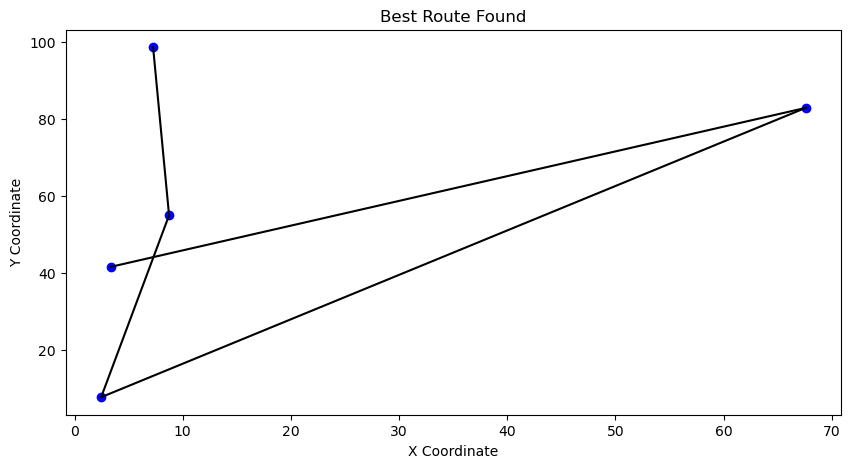

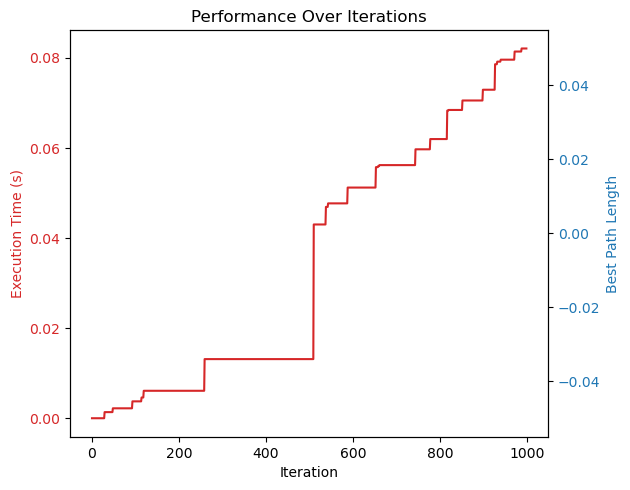

In [41]:
points = np.random.rand(num_sommets, 2) * 100 
print("\nMatrice pondérée:")
for row in tsp_matrice:
    print(row) 
solution, length , execution_times , distances  = hill_climbing(tsp_matrice)   
print(f"Solution trouvée : {solution} avec une longueur de chemin de : {length}")    
if solution:
    plot_route(solution, points)  

plot_performance(execution_times, distances)  